## k近傍法（k-Nearest Neighbors：k-NN<br>

k近傍法（k-Nearest Neighbors：k-NN<br>

「わからないデータ（＝未知データ）」があったら、<br>
それに一番近い k個の既知データを探して、<br>
そのラベルで多数決して分類する方法。<br>





In [10]:
from google.colab import files
uploaded = files.upload()

Saving classification_clustering_data.py to classification_clustering_data.py


0 [280 139] [164.61181651 124.78651221] 距離は 116.2602947023548 ラベルは0
1 [280 139] [264.79489894 171.62491674] 距離は 35.994170229868416 ラベルは1
2 [280 139] [306.34363731 135.8953206 ] 距離は 26.52595447665568 ラベルは1
3 [280 139] [323.95670958 178.31281463] 距離は 58.97194003280886 ラベルは1
4 [280 139] [288.38048385 189.41015421] 距離は 51.102017152320826 ラベルは0
5 [280 139] [229.48283511 174.17766472] 距離は 61.55852535332682 ラベルは0
6 [280 139] [317.7232358  186.97910252] 距離は 61.03307953763329 ラベルは1
7 [280 139] [240.35901199 153.03556765] 距離は 42.05240884499591 ラベルは0
8 [280 139] [298.74945267 126.11168346] 距離は 22.75193790998488 ラベルは1
9 [280 139] [312.43737225 176.65789466] 距離は 49.70211412715487 ラベルは1
10 [280 139] [204.29765748 170.2444328 ] 距離は 81.89663756229017 ラベルは0
11 [280 139] [341.95603111 181.20949463] 距離は 74.96793466425022 ラベルは1
12 [280 139] [231.9895469  149.94052478] 距離は 49.2412295676001 ラベルは0
13 [280 139] [281.84934028 169.10865503] 距離は 30.16539685114012 ラベルは0
14 [280 139] [263.98119747 174.8467927 ] 距離

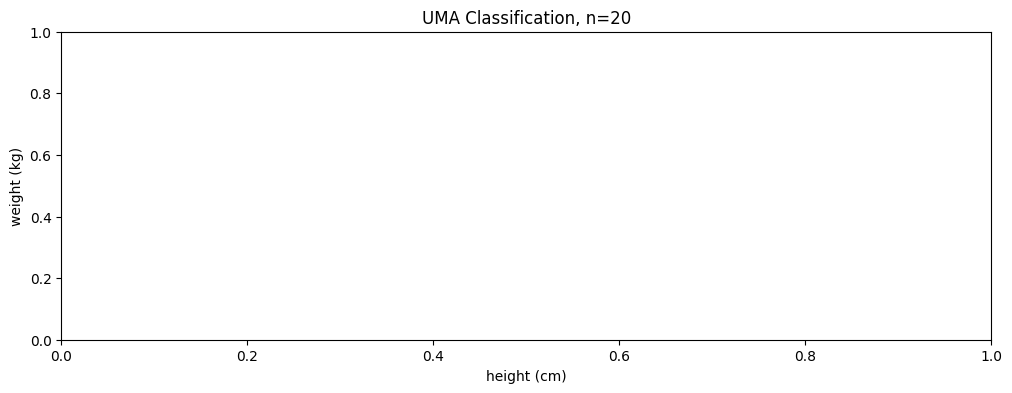

In [11]:
'''
ライブラリとデータ読み込み
matplotlib, numpy, scipy: グラフ・配列・統計処理に必要
classification_clustering_data.py からデータ（UMA_X, UMA_Y）を読み込む
'''
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from classification_clustering_data import * # 外部ファイルからデータ読込

'''
② データ準備
UMA_X: 既知UMAの身長・体重（説明変数）
UMA_Y: そのUMAの性別（目的変数、0 or 1）
未知X: 性別がわからないUMAのデータ（3体）
見る近傍の数 = 3: k-NNの「k」＝3
'''
説明変数Xの配列 = UMA_X
目的変数Yの配列 = UMA_Y
未知Xの配列 = np.array([[280, 139],[200,139],[280,165]]) # 性別未知のUMAが3体
見る近傍の数 = 3

'''
③ ユークリッド距離を計算（ピタゴラス）
2点の距離を計算（√((x2-x1)^2 + (y2-y1)^2)）
例：
身長体重1 = [180, 70]
身長体重2 = [170, 65]

距離 = √((170 - 180)^2 + (65 - 70)^2)
     = √((-10)^2 + (-5)^2)
     = √(100 + 25)
     = √125 ≒ 11.18
'''
def ユークリッド距離を計算(身長体重1,身長体重2): # ピタゴラスの定理で計算
    return np.sqrt((身長体重2[0]-身長体重1[0])**2 + (身長体重2[1]-身長体重1[1])**2)


'''
④ 未知UMAとすべての既知UMAの距離を出す
未知UMAと全ての既知UMAの距離を順番に計算して、配列で返す
既知データの配列：複数のUMAのデータ（例：20体分の [身長, 体重]）
'''

'''引数
未知データの配列：1体のUMAの身長・体重（例：[180, 70]）
'''
def 既知データ全てとの距離を計算(未知データの配列,既知データの配列):
    #距離を保存していくための 空の配列 を用意（型はfloat）
    返す配列 = np.empty(0,float)
    #現在どのデータを見ているかを記録（ラベル出力に使う）
    カウント = 0

    #全ての既知UMAを1体ずつ取り出して処理するループ
    for 既知データi in 既知データの配列:
        #ユークリッド距離を計算() 関数を使って、未知UMAと現在の既知UMAとの距離を計算
        ユークリッド距離=ユークリッド距離を計算(未知データの配列,既知データi)
        #各ステップでの デバッグ出力（どのUMAと距離を測ってるかを表示）
        print(str(カウント)+" ",end="")
        print(未知データの配列,既知データi,end="")
        print(" 距離は "+str(ユークリッド距離),end="")
        print(" ラベルは" + str(目的変数Yの配列[カウント]))
        #計算した距離を配列に追加
        返す配列=np.append(返す配列,ユークリッド距離)
        #次のUMAに進むためのインデックス更新
        カウント += 1
    return 返す配列

'''
⑤ 小さい距離の順にk個のインデックスを返す
argsort()で小さい順に並び替えたときのインデックスを返す
例えば距離が [1.0, 2.0, 0.5] なら → [2, 0, 1]
'''
def 小さいほうから配列の番号をk個取得(配列,k):
    #元の配列の 小さい順に並べたときのインデックスを返す
    ソート済の配列 = 配列.argsort() # これ便利ですね
    #上からk個取り出す
    return(ソート済の配列[0:k]) # 0からkの直前まで(kが3なら0,1,2番)

#未知データ（未知のUMA）に割り当てたラベル（性別）を保存する配列
予測したラベルの配列 = np.empty(0,bool)


'''
⑥ メイン処理：k-NN分類を行う
各未知UMAに対して：
配列の中で「値が小さい順」に並べたときのインデックス（番号）を 上からk個返す
未知のUMA（性別がわからない個体）それぞれに対して、既知データと比較し、性別を予測

・与えられるデータ(20体)：
  ・UMA_X:身長・体重(2次元)
  ・UMA_Y：性別ラベル

・未知データ（3体）：
  ・未知X = np.array([[280, 139], [200,139], [280,165]])

・処理の流れ（3体のUMAに対して順番に）

  ・Step 1：未知の1体を取り出す（例：280, 139）

  ・Step 2：全既知20体とのユークリッド距離を求める
  →合計で 20個の距離 ができる（例：[15.2, 18.9, ..., 7.5]）

  ・Step3：20個の距離の配列から小さい順に並べた インデックスを3つ取得
  →小さいほうから配列の番号をk個取得(距離配列, 3) → 例えば [7, 12, 4]

  ・Step 4：小さいほうから配列の番号に対応する既知のデータ配列から性別ラベルと取り出す。
    目的変数Y[7] → 1
    目的変数Y[12] → 0
    目的変数Y[4] → 1
    → [1, 0, 1]

  ・Step 5：多数決（最頻値）を取る
    →stats.mode([1, 0, 1]) → 1（女）

  ・Step 6：この1体の予測ラベルとして保存

  これを未知の3体すべてに対して繰り返す
'''

#未知のUMA 1体ずつに対して処理を繰り返す
for 未知データi in range(len(未知Xの配列)):
    #未知Xの配列[未知データi] は、1体分の [身長, 体重]
    #これをすべての既知UMAと比較し、距離（似てる度合い）を配列で取得する
    既知データとの距離の配列 = 既知データ全てとの距離を計算(未知Xの配列[未知データi],説明変数Xの配列)
    #この配列に「近くにいた既知UMAの性別ラベル（0 or 1）」を入れていく
    n個の近所のラベルの配列 = np.empty(0,bool) # 多数決用ラベルの配列

    #距離が小さい順にk個のインデックスを取得
    for index in (小さいほうから配列の番号をk個取得(既知データとの距離の配列,見る近傍の数)):
        #それに対応する性別ラベル（目的変数Yの配列の要素）を取得して追加する
        n個の近所のラベルの配列=np.append(n個の近所のラベルの配列,目的変数Yの配列[index])

    #stats.mode() は「一番多い値（＝最頻値）」を返す → 多数決
    #[0] をつけるのは、戻り値が配列だから
    多数決の結果=stats.mode(n個の近所のラベルの配列, axis=0)[0]

    #この未知UMAに対する性別予測を、配列に追加していく
    予測したラベルの配列=np.append(予測したラベルの配列,多数決の結果)

    #どのインデックスを見て、どう多数決したかを出力（理解・確認用）
    print("小さいほうから順に"+str(見る近傍の数),end="")
    print(小さいほうから配列の番号をk個取得(既知データとの距離の配列,見る近傍の数))
    print("多数決します",end="")
    print(n個の近所のラベルの配列,end="") # このラベル配列から多数決
    print(多数決の結果)

#最後に、**すべての未知UMAに対する分類結果（0 or 1の配列）**を出力
分類結果=予測したラベルの配列
print("未知データの分類結果は "+str(分類結果))

########## これよりメイン処理の後半(図の表示) ##########
plt.figure(figsize=(12, 4))
plt.title("UMA Classification, n=20, k="+str(見る近傍の数))
plt.title("UMA Classification, n=20")
plt.xlabel("height (cm)")
plt.ylabel("weight (kg)")

# 集団ごとにfor文でscatterの色を分ける(既知データ)
colors=['red','blue'] # 分類結果が0ならred、1ならblue
############ この下の3行のコメントを外しましょう、その1 ############
#for i in range(2): # 2値分類なので2
#    散布図データ=説明変数Xの配列[目的変数Yの配列==i]
#    plt.scatter(散布図データ[:,0],散布図データ[:,1],marker="o",c=colors[i],s=20)# 丸形でサイズ20

# 未知データも散布図へ重ねる
############ この下の3行のコメントを外しましょう、その2 ############
#for i in range(2): # 2値分類なので2
#    散布図データ=未知Xの配列[分類結果==i]
#    plt.scatter(散布図データ[:,0],散布図データ[:,1],marker="o",c=colors[i],s=20)# 丸形でサイズ20
    # 任意課題(3)で形を変えたい時は、好きな形(星形など)やサイズにしましょう

plt.show()